# Import image

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

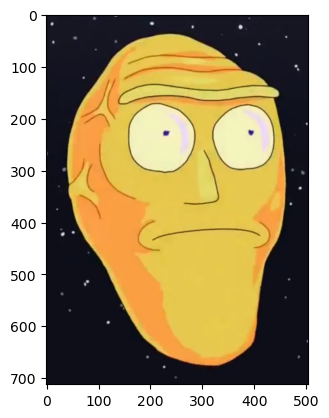

In [2]:
# import and plot chosen image
loc_input_img = os.path.join('..', 'data', 'input', 'showmewhatyougot.png')
image = Image.open(loc_input_img)
np_image = np.array(image)
plt.imshow(np_image)
plt.show()

# Square

In [3]:
# function to make image square, padding with minimum values
# make life easier
def make_square(im):
    (a, b) = im.shape[0:2]
    if a > b:
        pad_size = ((0,0),((a-b)//2,(a-b)-((a-b)//2)),(0,0))
    else:
        pad_size = (((b-a)//2,(b-a)-((b-a)//2)),(0,0),(0,0))
    return np.pad(im, pad_size, mode = 'minimum')

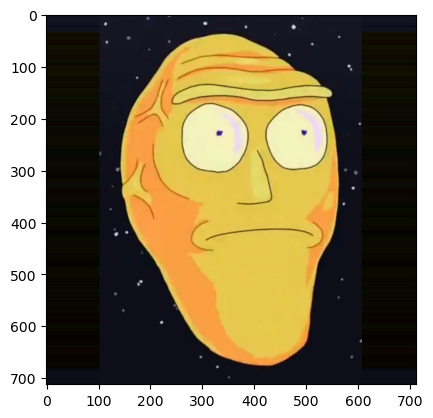

In [4]:
im_square = np_image.copy()
im_square = make_square(im_square)
plt.imshow(im_square)
plt.show()

# Tiles

In [5]:
# function to tile a floor with image, input length and width
def tile_floor(im, floor_width, floor_length):
    tile_matrix = np.array([[[0 for i in range(1)] for j in range(floor_width)] for k in range(floor_length)])
    floor_size = tile_matrix.shape
    return np.tile(im, floor_size)

Enter width and length of floor, seperated by a space. Both numbers should be natural numbers between 1 and 10. 5 8


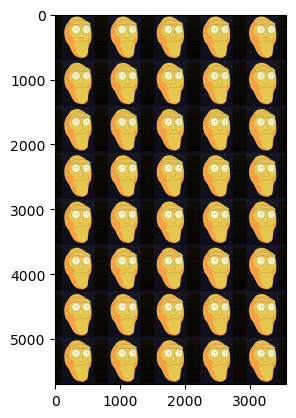

In [6]:
while True:
    try:
        width, length = map(int, input("Enter width and length of floor, seperated by a space. Both numbers should be natural numbers between 1 and 10.").split())
    except ValueError:
        print("2 positive numbers between 1 and 10, seperated with a space, are expected.")
    else:
        if 1 <= width <= 10 and 1 <= length <= 10:
            break
        else:
            print("2 positive numbers between 1 and 10, seperated with a space, are expected.")
im_tiles = im_square.copy()
im_tiles = tile_floor(im_tiles, width, length)
plt.imshow(im_tiles)
plt.show()

# Flips

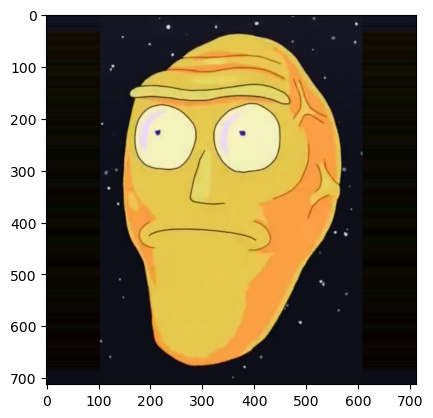

In [7]:
# the clue is in the name
im_flip_leftright = im_square.copy()
im_flip_leftright = np.fliplr(im_flip_leftright)
plt.imshow(im_flip_leftright)
plt.show()

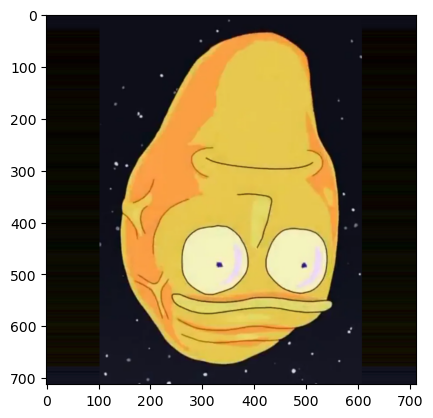

In [8]:
# the clue is in the name
im_flip_updown = im_square.copy()
im_flip_updown = np.flipud(im_flip_updown)
plt.imshow(im_flip_updown)
plt.show()

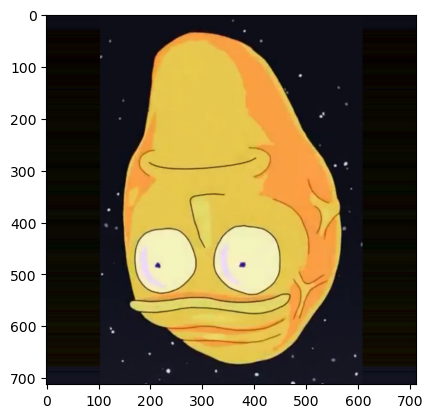

In [9]:
# the clue is in the name
im_flip_both = im_square.copy()
im_flip_both = np.fliplr(np.flipud(im_flip_both))
plt.imshow(im_flip_both)
plt.show()

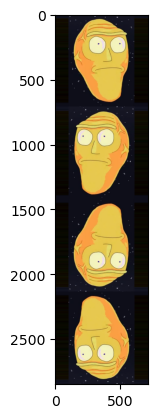

In [10]:
# combine flips
im_vert = im_square.copy()
im_vert = np.concatenate([im_square, im_flip_leftright, im_flip_updown, im_flip_both], axis = 0)
plt.imshow(im_vert)
plt.show()

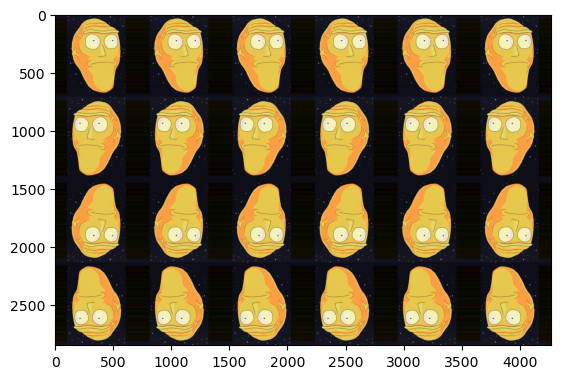

In [11]:
# reproduce pickle example
im_flips = im_vert.copy()
im_flips = np.tile(im_flips, (1, 6, 1))
plt.imshow(im_flips)
plt.show()

In [12]:
# what's in a name
dic_fun = {
    '0' : im_square,
    '1' : im_flip_leftright,
    '2' : im_flip_updown,
    '3' : im_flip_both
}

Enter width of grid. This should be a natural number between 1 and 10. 5


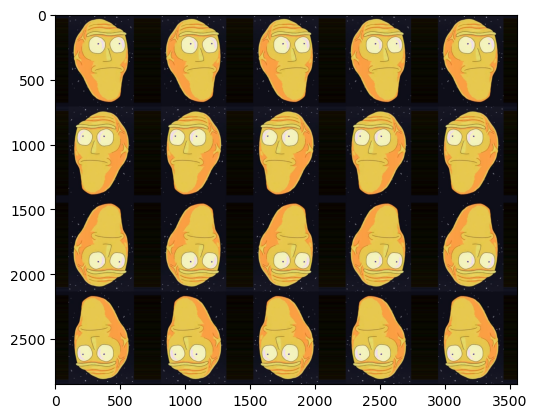

In [13]:
# test dictionary
while True:
    try:
        grid_width = int(input("Enter width of grid. This should be a natural number between 1 and 10."))
    except ValueError:
        print("A positive number between 1 and 10 is expected.")
    else:
        if 1 <= grid_width <= 10:
            break
        else:
            print("A positive number between 1 and 10 is expected.")
im_vert = im_square.copy()
im_vert = np.concatenate([dic_fun['0'], dic_fun['1'], dic_fun['2'], dic_fun['3']], axis = 0)
im_flips = np.tile(im_vert, (1, grid_width, 1))
plt.imshow(im_flips)
plt.show()

Enter width and length of grid, seperated by a space. Both numbers should be natural numbers between 1 and 10. 5 8


[[0 0 3 3 1]
 [2 0 1 1 3]
 [3 2 1 0 1]
 [3 0 1 3 3]
 [0 0 2 0 2]
 [2 1 0 2 3]
 [1 2 0 3 0]
 [1 3 0 2 1]]


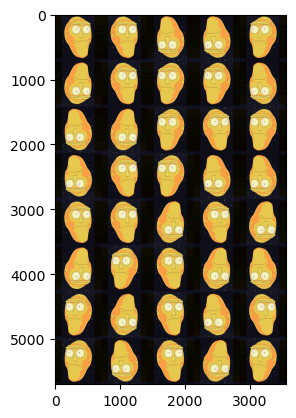

In [14]:
# let's get schwifty: randomize matrix for flips
while True:
    try:
        grid_width, grid_length = map(int, input("Enter width and length of grid, seperated by a space. Both numbers should be natural numbers between 1 and 10.").split())
    except ValueError:
        print("2 positive numbers between 1 and 10, seperated with a space, are expected.")
    else:
        if 1 <= grid_width <= 10 and 1 <= grid_length <= 10:
            break
        else:
            print("2 positive numbers between 1 and 10, seperated with a space, are expected.")

flip_matrix =  np.random.randint(0, 4, size=(grid_length, grid_width))
print(flip_matrix)

flipped_grid = np.array([])
for i in range(len(flip_matrix)):
    flipped_row = np.array([])
    for j in flip_matrix[i,:]:
        if flipped_row.size == 0:
            flipped_row = dic_fun[str(j)]
        else:
            flipped_row = np.concatenate([flipped_row, dic_fun[str(j)]], axis = 1)
            
    if flipped_grid.size == 0:
        flipped_grid = flipped_row
    else:
        flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)

plt.imshow(flipped_grid)
plt.show()

In [15]:
# function for flips in a grid, input image and (max 10x10) matrix of numbers 0 to 3
def grid_with_flips(im, matrix):
    
    dict_fun = {
        '0' : make_square(im),
        '1' : np.fliplr(make_square(im)),
        '2' : np.flipud(make_square(im)),
        '3' : np.fliplr(np.flipud(make_square(im)))
    }

    flipped_grid = np.array([])
    for i in range(len(matrix)):
        flipped_row = np.array([])
        for j in matrix[i,:]:
            if flipped_row.size == 0:
                flipped_row = dict_fun[str(j)]
            else:
                flipped_row = np.concatenate([flipped_row, dict_fun[str(j)]], axis = 1)
            
        if flipped_grid.size == 0:
            flipped_grid = flipped_row
        else:
            flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)
    return flipped_grid

Enter width of grid (between 1 and 10) and length of grid (between 1 and 4), seperated by a space. Both numbers should be natural numbers. 8 4


[[0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3]]


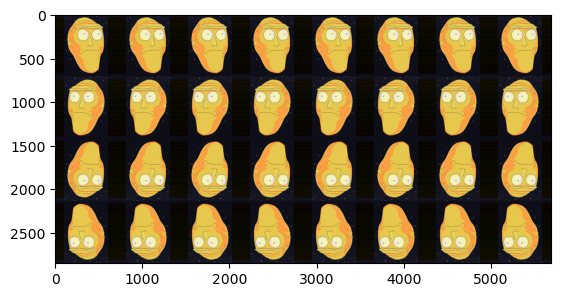

In [16]:
# example with fixed matrix (as project example)
while True:
    try:
        grid_width, grid_length = map(int, input("Enter width of grid (between 1 and 10) and length of grid (between 1 and 4), seperated by a space. Both numbers should be natural numbers.").split())
    except ValueError:
        print("2 positive numbers, the first between 1 and 10 and the second between 1 and 4, seperated with a space, are expected.")
    else:
        if 1 <= grid_width <= 10 and 1 <= grid_length <= 4:
            break
        else:
            print("2 positive numbers, the first between 1 and 10 and the second between 1 and 4, seperated with a space, are expected.")

flip_matrix = np.array([[j for i in range(grid_width)] for j in range(grid_length)])
print(flip_matrix)
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

Enter width and length of grid, seperated by a space. Both numbers should be natural numbers between 1 and 10. 8 9


[[2 1 1 3 3 1 3 3]
 [1 0 1 3 2 1 3 0]
 [1 2 2 0 2 3 3 2]
 [2 1 0 3 1 1 2 1]
 [1 1 3 3 1 3 3 3]
 [2 2 2 1 1 1 1 0]
 [3 0 2 3 0 2 1 2]
 [3 3 2 2 0 2 0 0]
 [0 3 0 2 0 1 2 1]]


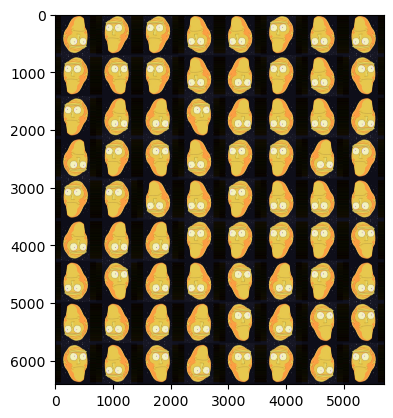

In [17]:
# example with schwifty matrix
while True:
    try:
        grid_width, grid_length = map(int, input("Enter width and length of grid, seperated by a space. Both numbers should be natural numbers between 1 and 10.").split())
    except ValueError:
        print("2 positive numbers between 1 and 10, seperated with a space, are expected.")
    else:
        if 1 <= grid_width <= 10 and 1 <= grid_length <= 10:
            break
        else:
            print("2 positive numbers between 1 and 10, seperated with a space, are expected.")
            
flip_matrix =  np.random.randint(0, 4, size = (grid_length, grid_width))
print(flip_matrix)
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

# Colors

In [18]:
# function to make image red and scale it ("scale" is the denominater of the scale (1/scale))
def red_resize(im, scale):
    im[:,:,[1,2]] = 0
    im = im[::scale, ::scale]
    return im

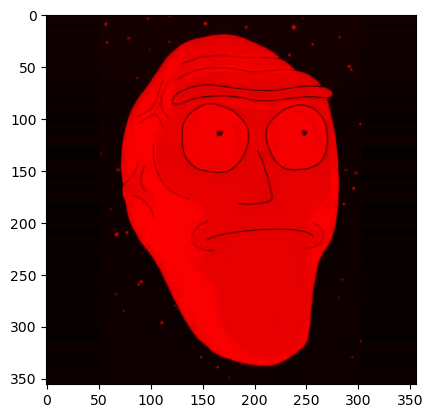

In [19]:
# example
red_im = im_square.copy()
red_im = red_resize(red_im, 2)
plt.imshow(red_im)
plt.show()

In [20]:
# same for green
def green_resize(im, scale):
    im[:,:,[0,2]] = 0
    im = im[::scale, ::scale]
    return im

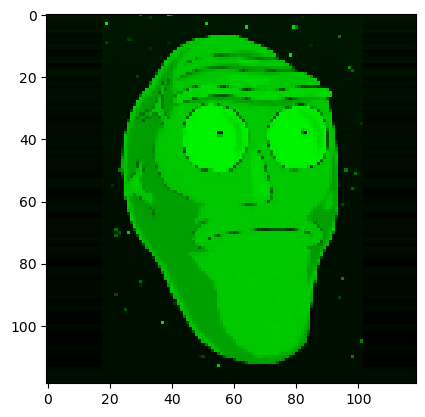

In [21]:
# example
green_im = im_square.copy()
green_im = green_resize(green_im, 6)
plt.imshow(green_im)
plt.show()

In [22]:
# same for blue
def blue_resize(im, scale):
    im[:,:,[0,1]] = 0
    im = im[::scale, ::scale]
    return im

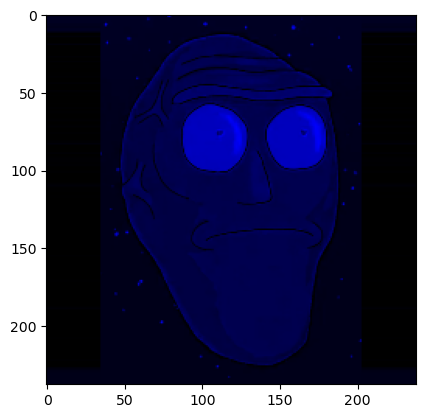

In [23]:
# example
blue_im = im_square.copy()
blue_im = blue_resize(blue_im, 3)
plt.imshow(blue_im)
plt.show()

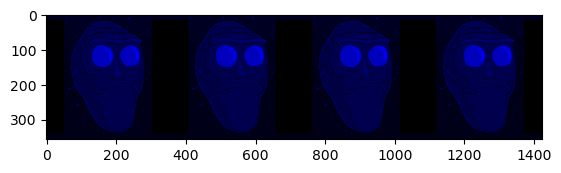

In [24]:
# build project example image (part 1) - blue tiles top row
top_row = np.tile(blue_resize(im_square.copy(), 2), (1, 4, 1))
plt.imshow(top_row)
plt.show()

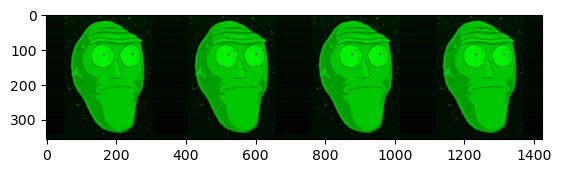

In [25]:
# build project example image (part 2) - green tiles bottom row
bottom_row = np.tile(green_resize(im_square.copy(), 2), (1, 4, 1))
plt.imshow(bottom_row)
plt.show()

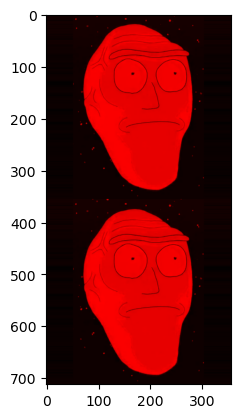

In [26]:
# build project example image (part 3) - red tiles sides
side = np.tile(red_resize(im_square.copy(), 2), (2, 1, 1))
plt.imshow(side)
plt.show()

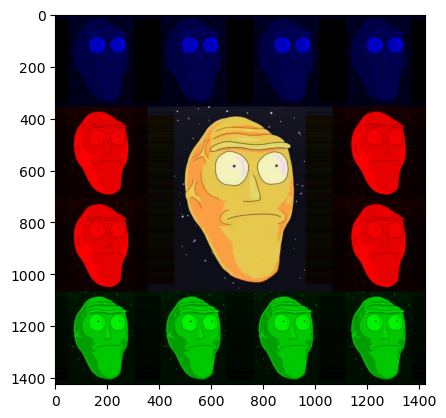

In [27]:
# build project example image (part 4) - tadaa!
im_colors = im_square.copy()
im_colors = np.concatenate((side, im_colors, side), axis = 1)
im_colors = np.concatenate((top_row, im_colors, bottom_row), axis = 0)
plt.imshow(im_colors)
plt.show()

In [28]:
# let's get schwifty, Morty - random color list
import random

scale = 3
list_length = 4*scale + 4
letters = 'rbg'

colors = random.choices(letters, k = list_length)

print(colors)

['r', 'r', 'r', 'g', 'r', 'b', 'g', 'r', 'g', 'r', 'g', 'b', 'g', 'r', 'g', 'r']


In [29]:
# dictionary of fun(ctions)
dict_col_fun = {
    'r' : red_resize,
    'b' : blue_resize,
    'g' : green_resize
}

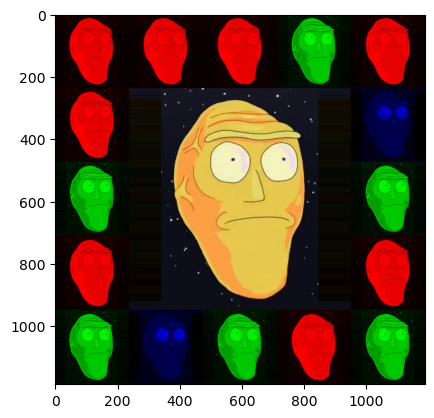

In [30]:
# code that builds the schwifty color picture
# each row or column built with a for loop
# deleting rows to make it fit when concatenated

im = im_square.copy()

toprow = np.array([])
for i in colors[0:scale + 2]:
    im = im_square.copy()
    if toprow.size == 0:
        toprow = dict_col_fun[i](im, scale)
    else:
        toprow = np.concatenate([toprow, dict_col_fun[i](im, scale)], axis = 1)

if toprow.shape[1] > im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1]:
    toprow = np.delete(toprow, np.s_[0: toprow.shape[1] - (im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1])], axis = 1)
elif im.shape[0] + 2*(dict_col_fun['r'](im, scale)).shape[1] > toprow.shape[1]:
    toprow = np.delete(toprow, np.s_[0: im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1] - toprow.shape[1]], axis = 1)

side_right = np.array([])
for i in colors[scale + 2:2*scale + 2]:
    im = im_square.copy()
    if side_right.size == 0:
        side_right = dict_col_fun[i](im, scale)
    else:
        side_right = np.concatenate([side_right, dict_col_fun[i](im, scale)], axis = 0)

if side_right.shape[0] > im.shape[0]:
    side_right = np.delete(side_right, np.s_[0: side_right.shape[0] - im.shape[0]], axis = 0)
elif im.shape[0] > side_right.shape[0]:
    side_right = np.delete(side_right, np.s_[0: im.shape[0] - side_right.shape[0]], axis = 0)

bottomrow = np.array([])
for i in colors[2*scale + 2:3*scale + 4]:
    im = im_square.copy()
    if bottomrow.size == 0:
        bottomrow = dict_col_fun[i](im, scale)
    else:
        bottomrow = np.concatenate([dict_col_fun[i](im, scale), bottomrow], axis = 1)

if bottomrow.shape[1] > im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1]:
    bottomrow = np.delete(bottomrow, np.s_[0: bottomrow.shape[1] - (im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1])], axis = 1)
elif im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1] > bottomrow.shape[1]:
    bottomrow = np.delete(bottomrow, np.s_[0: im.shape[1] + 2*(dict_col_fun['r'](im, scale)).shape[1] - bottomrow.shape[1]], axis = 1)

side_left = np.array([])
for i in colors[3*scale + 4:4*scale + 5]:
    im = im_square.copy()
    if side_left.size == 0:
        side_left = dict_col_fun[i](im, scale)
    else:
        side_left = np.concatenate([dict_col_fun[i](im, scale), side_left], axis = 0)

if side_left.shape[0] > im.shape[0]:
    side_left = np.delete(side_left, np.s_[0: side_left.shape[0] - im.shape[0]], axis = 0)
elif im.shape[0] > side_left.shape[0]:
    side_left = np.delete(side_left, np.s_[0: im.shape[0] - side_left.shape[0]], axis = 0)

im_colors = im_square.copy()
im_colors = np.concatenate((side_left, im_colors, side_right), axis = 1)
im_colors = np.concatenate((toprow, im_colors, bottomrow), axis = 0)

plt.imshow(im_colors)
plt.show()

In [61]:
def create_colorful_toprow(im, colors, scale):

    dict_col_fun = {
        'r' : red_resize(make_square(im.copy()), scale),
        'b' : blue_resize(make_square(im.copy()), scale),
        'g' : green_resize(make_square(im.copy()), scale)
    }
    
    toprow = np.array([])
    for i in colors[0:scale + 2]:
        if toprow.size == 0:
            toprow = dict_col_fun[i]
        else:
            toprow = np.concatenate([toprow, dict_col_fun[i]], axis = 1)

    if toprow.shape[1] > (make_square(im.copy())).shape[1] + 2*(dict_col_fun['r']).shape[1]:
        toprow = np.delete(toprow, np.s_[0: toprow.shape[1] - ((make_square(im.copy())).shape[1] + 2*(dict_col_fun['r']).shape[1])], axis = 1)
    elif (make_square(im.copy())).shape[0] + 2*(dict_col_fun['r']).shape[1] > toprow.shape[1]:
        toprow = np.delete(toprow, np.s_[0: (make_square(im.copy())).shape[1] + 2*(dict_col_fun['r']).shape[1] - toprow.shape[1]], axis = 1)
    
    return toprow

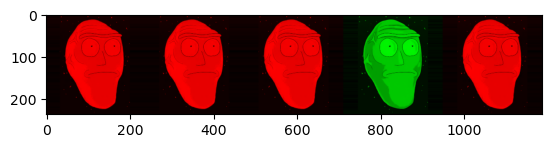

In [62]:
test = np_image.copy()
test = create_colorful_toprow(test, colors, scale)
plt.imshow(test)
plt.show()

In [63]:
def create_colorful_right_side(im, colors, scale):

    dict_col_fun = {
        'r' : red_resize(make_square(im.copy()), scale),
        'b' : blue_resize(make_square(im.copy()), scale),
        'g' : green_resize(make_square(im.copy()), scale)
    }
    
    side_right = np.array([])
    for i in colors[scale + 2:2*scale + 2]:
        if side_right.size == 0:
            side_right = dict_col_fun[i]
        else:
            side_right = np.concatenate([side_right, dict_col_fun[i]], axis = 0)

    if side_right.shape[0] > (make_square(im.copy())).shape[0]:
        side_right = np.delete(side_right, np.s_[0: side_right.shape[0] - (make_square(im.copy())).shape[0]], axis = 0)
    elif (make_square(im.copy())).shape[0] > side_right.shape[0]:
        side_right = np.delete(side_right, np.s_[0: (make_square(im.copy())).shape[0] - side_right.shape[0]], axis = 0)
    
    return side_right

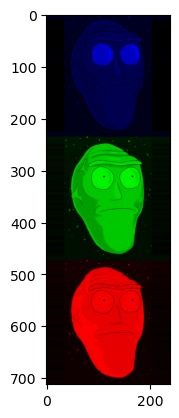

In [64]:
test = np_image.copy()
test = create_colorful_right_side(test, colors, scale)
plt.imshow(test)
plt.show()

In [ ]:
# def create_colorful_big_one(im, colors, scale):